# CDC COVID-19 U.S. Case Surveillance

### Gather 10M records from the CDC public data set to create a time series starting from January 2020, frequency plots by category

#### Calvin D'Souza

---

[CDC COVID-19 Case Surveillance Public Use Data](https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data/vbim-akqf)

[CDC API Website](https://dev.socrata.com/foundry/data.cdc.gov/vbim-akqf) 

---

Task List:
- [x] Get Data and convert string dates to datetime
- [x] Plot frequencies: Gender, Race/Ethnicity, Age Group
- [x] Plot Time series
- [ ] Automate Job

In [1]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sodapy import Socrata

%matplotlib inline

# Set figure size in inches
rcParams['figure.figsize'] = 14,9

## Collect and Clean Data

In [2]:
# Unauthenticated client only works with public data sets. 'None'
# in place of application token, and no username or password:
client = Socrata("data.cdc.gov", None)

# First 10M results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("vbim-akqf", limit=10000000)

# Convert to pandas DataFrame
df = pd.DataFrame.from_records(results)

In [3]:
df.head()

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,onset_dt
0,2020-10-23T00:00:00.000,2021-01-28T00:00:00.000,2020-10-23T00:00:00.000,Laboratory-confirmed case,Female,0 - 9 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing,NaN
1,2020-10-23T00:00:00.000,2020-10-23T00:00:00.000,2020-10-23T00:00:00.000,Laboratory-confirmed case,Female,0 - 9 Years,"Black, Non-Hispanic",No,Unknown,No,No,NaN
2,2020-10-23T00:00:00.000,2020-10-25T00:00:00.000,2020-10-23T00:00:00.000,Laboratory-confirmed case,Female,0 - 9 Years,"Black, Non-Hispanic",No,Missing,Missing,Missing,2020-10-23T00:00:00.000
3,2020-10-23T00:00:00.000,2020-10-25T00:00:00.000,2020-10-23T00:00:00.000,Laboratory-confirmed case,Female,0 - 9 Years,"Black, Non-Hispanic",Missing,Missing,Missing,Missing,NaN
4,2020-10-23T00:00:00.000,2020-10-26T00:00:00.000,2020-10-23T00:00:00.000,Laboratory-confirmed case,Female,0 - 9 Years,"Black, Non-Hispanic",No,Missing,No,Missing,NaN


In [4]:
# All are objects, we need to convert columns ending in 'dt' to datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 12 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   cdc_case_earliest_dt     object
 1   cdc_report_dt            object
 2   pos_spec_dt              object
 3   current_status           object
 4   sex                      object
 5   age_group                object
 6   race_ethnicity_combined  object
 7   hosp_yn                  object
 8   icu_yn                   object
 9   death_yn                 object
 10  medcond_yn               object
 11  onset_dt                 object
dtypes: object(12)
memory usage: 915.5+ MB


In [5]:
# Convert string to datetime
df['cdc_case_earliest_dt']=pd.to_datetime(df.cdc_case_earliest_dt)

# Sort by ascending date
df.sort_values(by=['cdc_case_earliest_dt'], inplace=True, ascending=True)

In [6]:
# Verify type has changed to datetime
df.dtypes

cdc_case_earliest_dt       datetime64[ns]
cdc_report_dt                      object
pos_spec_dt                        object
current_status                     object
sex                                object
age_group                          object
race_ethnicity_combined            object
hosp_yn                            object
icu_yn                             object
death_yn                           object
medcond_yn                         object
onset_dt                           object
dtype: object

## Gender Frequency

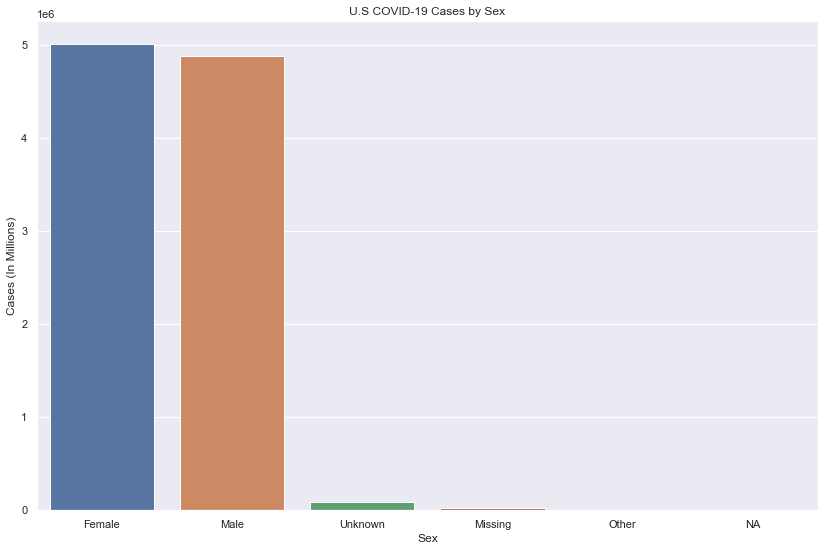

In [8]:
# Plot Histogram
sns.countplot(x='sex', data=df)
plt.title("U.S COVID-19 Cases by Sex")
plt.xlabel("Sex")
plt.ylabel("Cases (In Millions)")

# plt.show()

# Export to Excel
sex_df = df['sex'].value_counts()
sex_df.to_excel("/Users/ally/cdc_covid_sex.xlsx")

# Download graph
plt.savefig('gender_graph.png', bbox_inches='tight')

## Race/Ethnicity Frequency

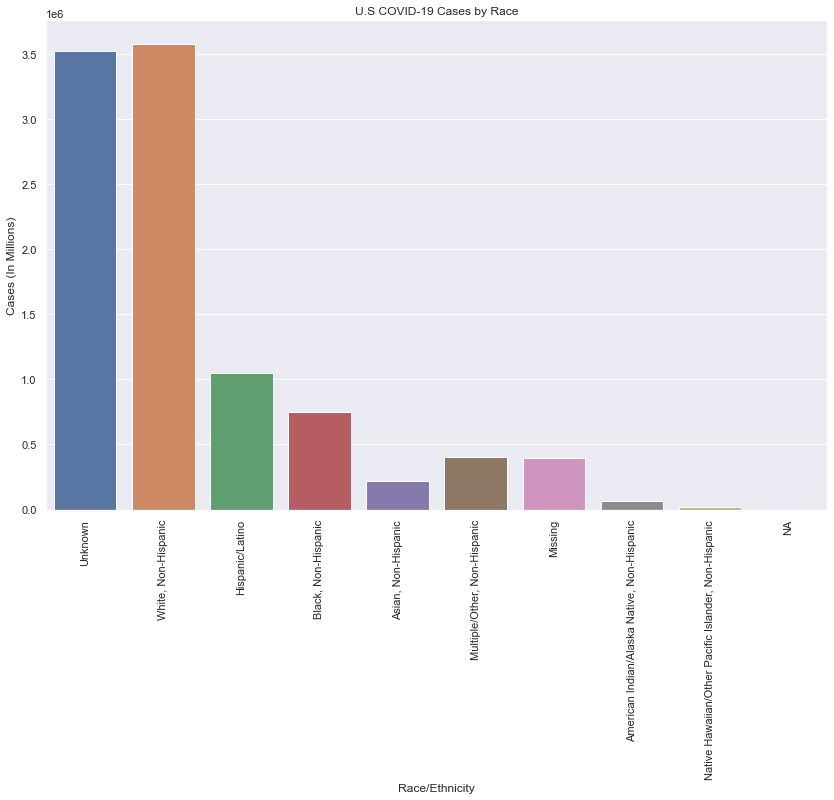

In [9]:
sns.countplot(x="race_ethnicity_combined", data=df)
plt.title("U.S COVID-19 Cases by Race")
plt.xlabel("Race/Ethnicity")
plt.ylabel("Cases (In Millions)")
plt.xticks(rotation=90)

# Export to Excel
df_race = df['race_ethnicity_combined'].value_counts()
df_race.to_excel("/Users/ally/cdc_covid_race.xlsx")

# Download graph
plt.savefig('race_graph.png', bbox_inches='tight')

## Age Group Frequency

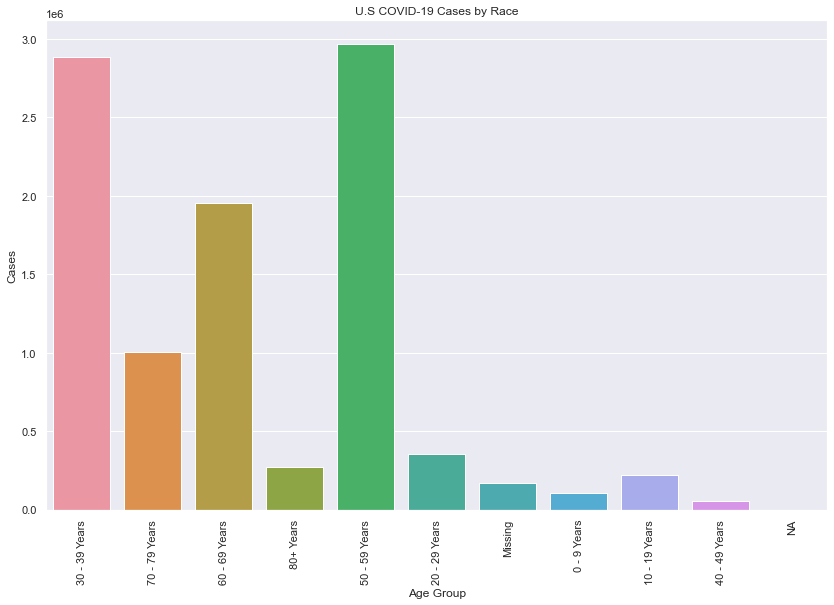

In [10]:
sns.countplot(x="age_group", data=df)
plt.title("U.S COVID-19 Cases by Race")
plt.xlabel("Age Group")
plt.ylabel("Cases")
plt.xticks(rotation=90)

# Export to Excel
df_age_group = df['age_group'].value_counts()
df_age_group.to_excel("/Users/ally/cdc_covid_age_group.xlsx")

# Download graph
plt.savefig('age_group_graph.png', bbox_inches='tight')

## Time Series

In [11]:
# How many entries each month?
df['cdc_case_earliest_dt'].value_counts()

2020-12-31    131985
2020-12-08    112802
2020-12-28     95618
2021-01-04     91849
2020-12-30     90463
               ...  
2020-01-18        18
2020-01-09        18
2020-02-09        17
2020-01-24        16
2020-01-16        12
Name: cdc_case_earliest_dt, Length: 441, dtype: int64

In [12]:
ts_df = pd.DataFrame(df.cdc_case_earliest_dt.value_counts().reset_index().values, columns=["Date", "Cases"])
# new_df = new_df.sort_index(axis = 0, ascending=True)
ts_df.to_excel("/Users/ally/cdc_covid_timeseries.xlsx")

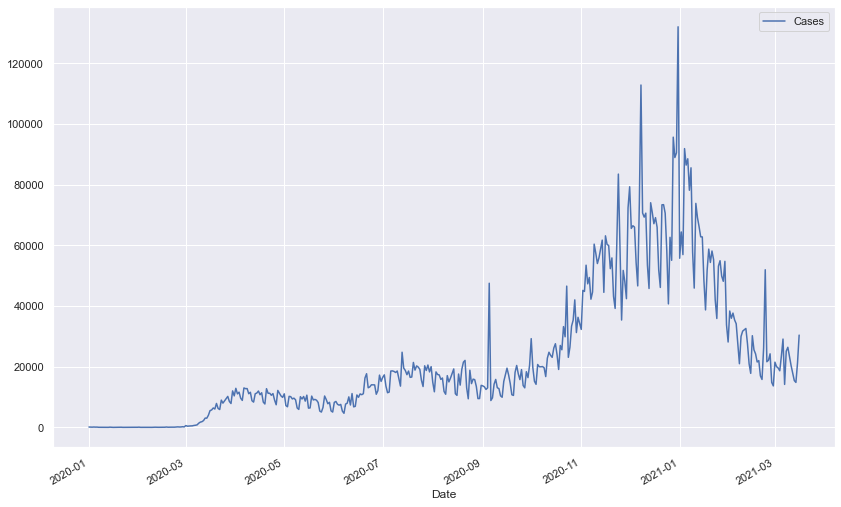

In [13]:
ts_df.plot(kind='line', x='Date', y='Cases')
plt.show()

In [15]:
# Download graph
plt.savefig('time_series_graph.png', bbox_inches='tight')

# Download to Excel
# df.to_excel("/Users/ally/cdc_covid_ts.xlsx")

<Figure size 1008x648 with 0 Axes>